In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns

/Users/rajivbhandari/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

In [3]:
# Get the total number of samples in the MNIST dataset
total_length = len(mnist.data)

print("Total number of samples in the MNIST dataset:", total_length)

Total number of samples in the MNIST dataset: 70000


In [4]:
# Extract features (x) and labels (y) from the dataset
x, y = mnist['data'], mnist['target']

In [5]:
# Check for missing values in the features (x) for data cleaning 
missing_values = x.isnull().sum().sum()

# Handle missing values (if any)
if missing_values > 0:
    # Drop rows with missing values
    x = x.dropna(axis=0)
    y = y[x.index]  # Adjust labels accordingly

In [6]:
# Visualize a digit from the dataset
some_digit = x.to_numpy()[49566]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

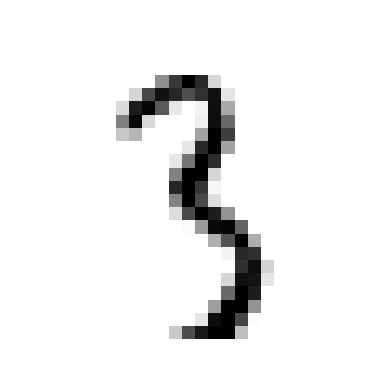

In [7]:
# Display the digit
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

In [8]:
# Split the data into training and testing sets
#60,000 data for training and 10,000 for testing 
x_train, x_test = x[:60000], x[6000:70000]
y_train, y_test = y[:60000], y[6000:70000]

In [9]:
# Shuffle the training data
#Shuffling the training data to ensure that the model does not learn patterns specific to the order of the data
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.to_numpy()[shuffle_index], y_train.to_numpy()[shuffle_index]

In [10]:
# Creating a binary classifier for detecting digit '2'
y_train = y_train.astype(np.int8) #Converts the training labels to integers
y_test = y_test.astype(np.int8) #Converts the testing labels to 
#Creating Binary Labels
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [11]:
# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)

# Predict whether the displayed digit is a '2' or not
example = clf.predict([some_digit])
if example:
    print("The predicted digit is '2'.")
else:
    print("The predicted digit is not '2'.")

The predicted digit is not '2'.


/Users/rajivbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Cross-validation to evaluate the classifier
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

/Users/rajivbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rajivbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

0.9784333333333333


/Users/rajivbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


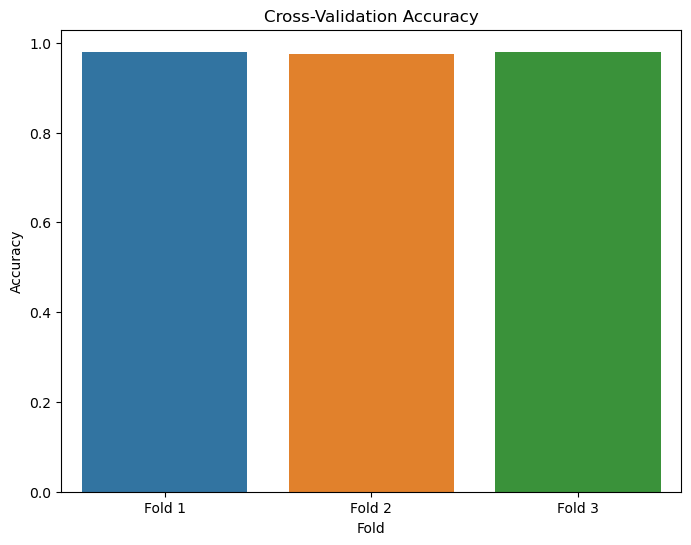

In [13]:
# Plot a bar chart for accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=[f"Fold {i+1}" for i in range(3)], y=a)
plt.title("Cross-Validation Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()